In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df = pd.read_csv('komenbersentimen.csv', index_col = 0)
df.head()

,Komentar,jumlahlike,tanggal,waktu,komentator,Sentimen
0,kalo udh di vaksin jangan fake masker kan kuat...,0,2021-09-02,10:02:43,rifkyslow8106,neutral
1,sy org desa tdk tau akal musibah saat ini enta...,0,2021-06-02,20:25:39,systergamebling3120,negative
2,umaku ikeba koronawakuchin wa kotoshi 2030 nen...,1,2021-05-03,09:38:47,awfulwinners6810,neutral
3,pernah dengar sunda empire bilang semua negara...,0,2021-02-14,21:50:17,blasphemian4868,negative
4,vaksin diri dengan berpuasa sunah jauhkan diri...,0,2021-02-06,21:07:04,palmcis365,positive


In [32]:
# panggil stopword id
list_stopwords = stopwords_scratch.words('indonesian')
# panggil stopword en
list_stopwords_en = stopwords_scratch.words('english')
# gabungkan id & en
list_stopwords.extend(list_stopwords_en)
# tambah daftar stopword jika perlu
list_stopwords.extend(['ya', 'yg', 'ga', 'yuk', 'dah', 'ngga', 'engga', 'ygy', 'wkwkwkwkkw', 'dok', 'sih'])
stopwords = list_stopwords

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464 entries, 0 to 463
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Komentar    461 non-null    object
 1   jumlahlike  464 non-null    int64 
 2   tanggal     464 non-null    object
 3   waktu       464 non-null    object
 4   komentator  464 non-null    object
 5   Sentimen    464 non-null    object
dtypes: int64(1), object(5)
memory usage: 25.4+ KB


In [34]:
df['Komentar'] = df['Komentar'].fillna('') 
df = df['Komentar'].to_list()

In [35]:
df[:10]

['kalo udh di vaksin jangan fake masker kan kuat haha',
 'sy org desa tdk tau akal musibah saat ini entah knp vaksin masuk ke desa sy banyak yg sakit setelah divaksin kalau tdk mau divaksin maka diancam tdk akan mendptkan tunjangan pkh politik macam apa lagi',
 'umaku ikeba koronawakuchin wa kotoshi 2030 nen made shippai shimasu koronawakuchin wa shippai shimasu men furui mono ga kotoshi shippai suru made atarash koronawakuchin 2021 2030 koronawakuchin wa shippai shimashita men wa kotoshi koronasupirittokorona ni ikimashou 2021 2030 korona ni ikimasu',
 'pernah dengar sunda empire bilang semua negara didunia harus daftar ulang itu ainya semua negara di seluruh dunia di vaksin total bener juga rangga sasana hehe',
 'vaksin diri dengan berpuasa sunah jauhkan diri dari maksiat perbanyak sodakoh subuh itu cinta bagi jiwa perindu surga',
 'mau jualan obat ya dibuat penyakitnya dulu',
 'vaksin celeng haram',
 'rakyat sdh muak sm isu corona yg membuat susah rakyat hentikanlah sandiwara busuk 

In [36]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
x = vectorizer.fit_transform(df[:100])

d:\eksperimen\appweb\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [37]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(x)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [38]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# get_feature_names is deprecated in scikit-learn versions >= 0.2
# and replaced by get_feature_names_out
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
  print("Cluster %d:" % i),
  for ind in order_centroids[i, :10]:
    print(' %s' % terms[ind])
  print()

Cluster 0:
 bayar
 duluan
 orang
 divaksin
 gak
 bang
 gratis
 serius
 aja
 gw

Cluster 1:
 vaksin
 cina
 kalo
 gak
 membunuh
 komen
 nya
 tdk
 like
 racun



In [39]:
from sklearn.metrics import silhouette_score

silhouette_score(x, labels=model.predict(x))

np.float64(0.009223791660527645)

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(x.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

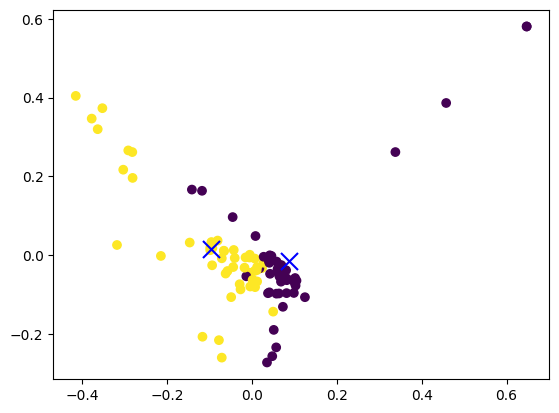

In [41]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(x))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')